In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from scipy.signal import find_peaks

plt.rcParams['figure.figsize'] = (20, 10)

In [4]:
sb = [np.loadtxt(f) for f in glob('/home/aalvarez/Phosphoros/AuxiliaryData/SEDs/CosmosSB/*.sed')]
sp = [np.loadtxt(f) for f in glob('/home/aalvarez/Phosphoros/AuxiliaryData/SEDs/CosmosSp/*.sed')]
ell = [np.loadtxt(f) for f in glob('/home/aalvarez/Phosphoros/AuxiliaryData/SEDs/CosmosEll/*.sed')]

In [30]:
def ratio(seds, cut=4000):
    r = []
    for s in seds:
        m = s[:,0] <= cut
        a = np.trapz(s[m, 1], s[m, 0])
        b = np.trapz(s[~m, 1], s[~m, 0])
        r.append(a/b)
    return r

In [31]:
rsb = ratio(sb)
rsp = ratio(sp)
rell = ratio(ell)

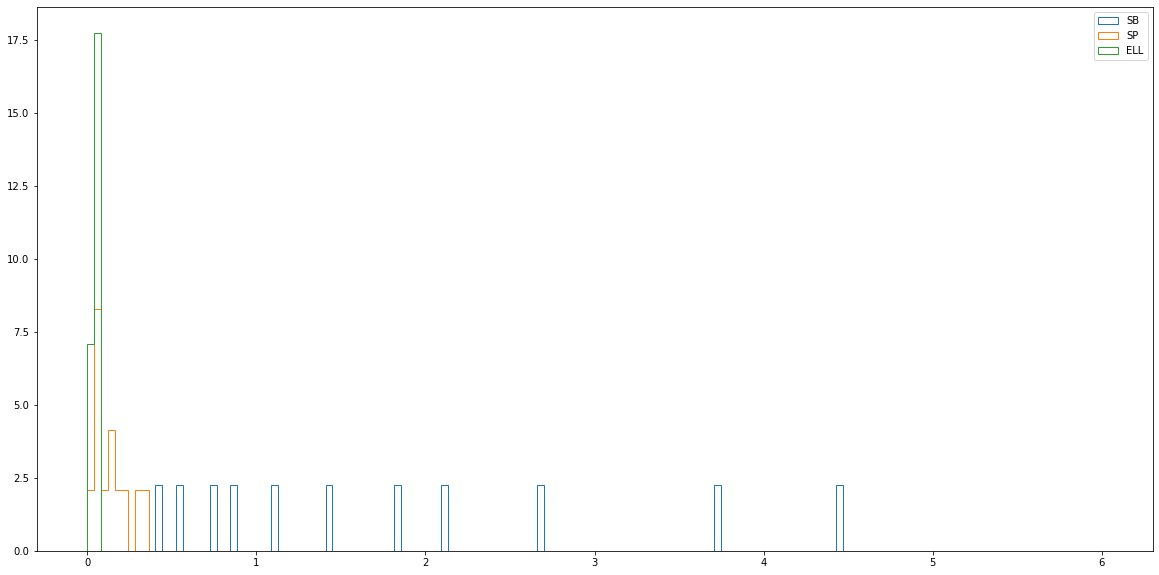

In [36]:
bins = np.linspace(0, 6, 150)
plt.figure()
plt.hist(rsb, label='SB', bins=bins, histtype='step', density=True)
plt.hist(rsp, label='SP', bins=bins, histtype='step', density=True)
plt.hist(rell, label='ELL', bins=bins, histtype='step', density=True)
plt.legend()
plt.show()

(array([ 520, 1532]), {})

2 1169.5 4477.13
2 1386.76 5942.92
2 1377.21 4477.13
2 1386.76 5942.92
2 1383.57 5847.9
2 1428.89 5942.92
2 1386.76 5942.92
2 1224.62 4477.13
2 1380.38 4487.45
2 1383.57 5046.61
2 1383.57 5929.25
2 1383.57 4977.37


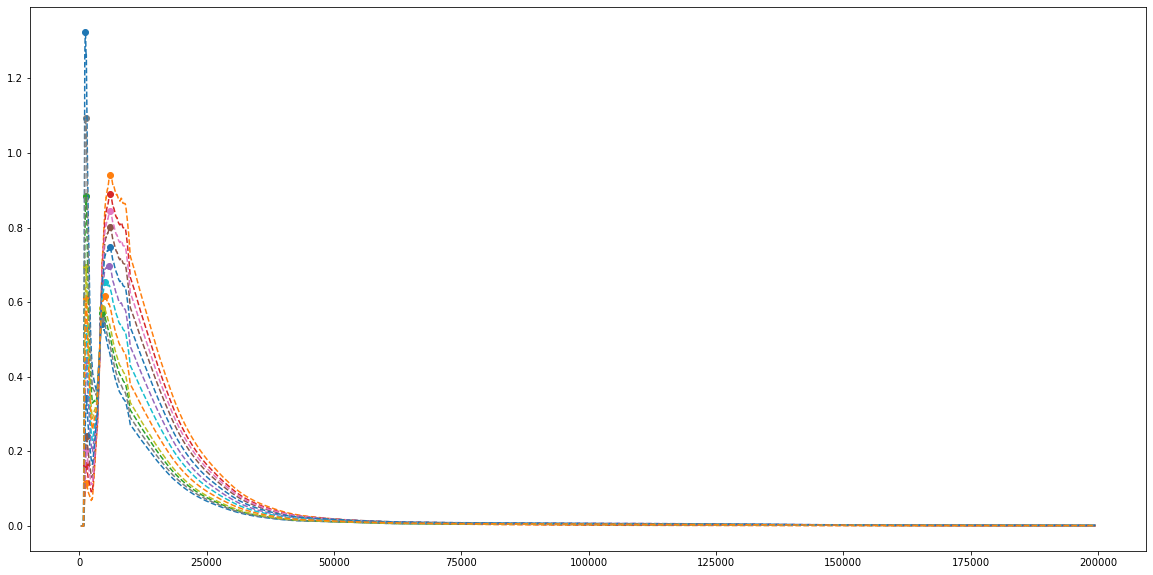

In [159]:
plt.figure()

for i in range(len(sp)):
    sed = sp[i]
    c = np.convolve(sed[:,1], np.ones(100), 'same')
    plt.plot(sed[:,0], c, '--')
    peaks, _ = find_peaks(c, distance=500, height=c.max()/10)
    plt.scatter(sed[peaks,0], c[peaks], marker='o')

    a, b = np.argpartition(c[peaks], 1)
    if sed[peaks[a],0] > sed[peaks[b],0]:
        a, b = b, a
    print(len(peaks), sed[peaks[a],0], sed[peaks[b], 0])

plt.show()

2 [1059.25 4226.69]
1 [1059.25]
2 [1059.25 4315.19]
1 [1059.25]
1 [1059.25]
2 [1059.25 4315.19]
2 [1059.25 4466.83]
2 [1047.13 4477.13]
2 [1059.25 4207.26]
1 [1051.96]
2 [1047.13 4477.13]
2 [1059.25 4246.2 ]


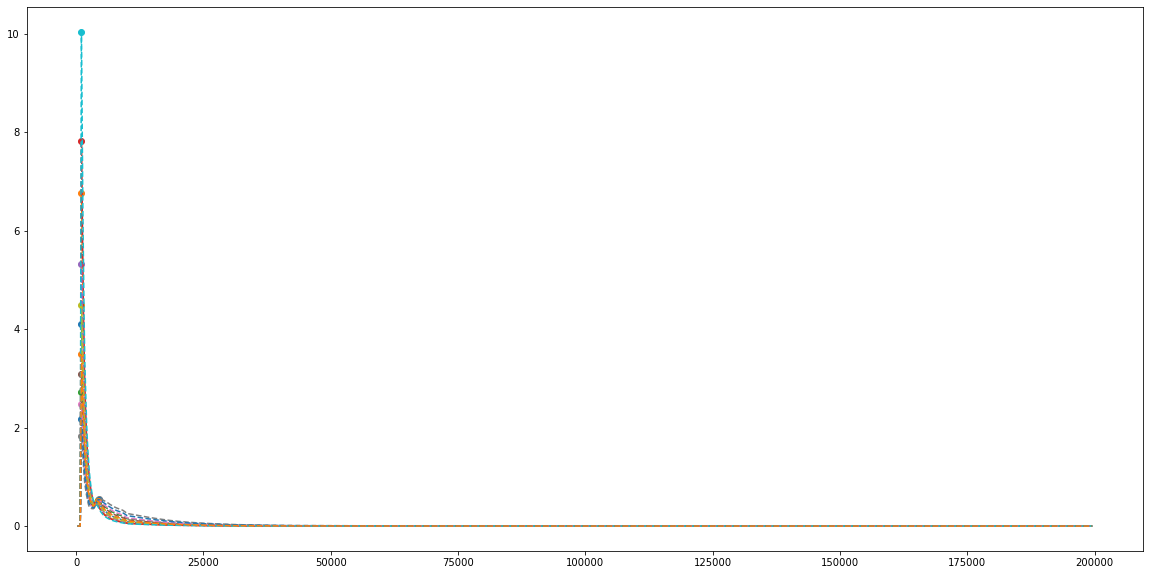

In [161]:
plt.figure()

for i in range(len(sb)):
    sed = sb[i]
    c = np.convolve(sed[:,1], np.ones(100), 'same')
    plt.plot(sed[:,0], c, '--')
    peaks, _ = find_peaks(c, distance=500, height=c.max()/10)
    plt.scatter(sed[peaks,0], c[peaks], marker='o')

    print(len(peaks), sed[peaks,0])

plt.show()

1 [5942.92]
1 [5011.87]
1 [5046.61]
1 [5942.92]
1 [5847.9]
1 [5236.]
1 [5847.9]


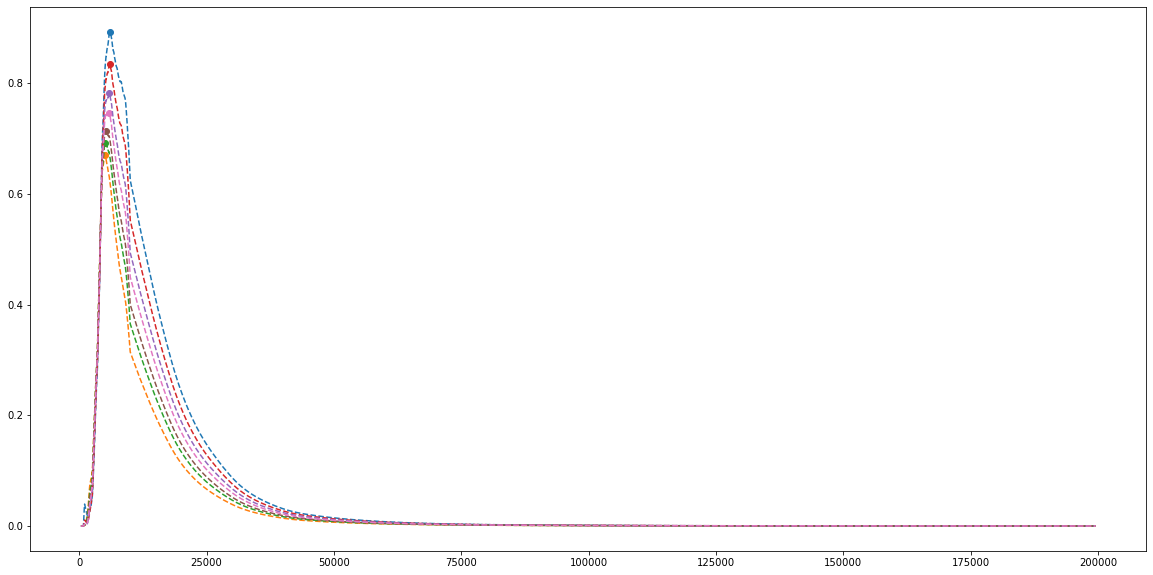

In [162]:
plt.figure()

for i in range(len(ell)):
    sed = ell[i]
    c = np.convolve(sed[:,1], np.ones(100), 'same')
    plt.plot(sed[:,0], c, '--')
    peaks, _ = find_peaks(c, distance=500, height=c.max()/10)
    plt.scatter(sed[peaks,0], c[peaks], marker='o')

    print(len(peaks), sed[peaks,0])

plt.show()